<a href="https://colab.research.google.com/github/smu-linear-algebra2/hs/blob/main/5%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B501.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import urllib.request

def url_to_image(url):
  resp = urllib.request.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype='uint8')
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)

  return image

image = url_to_image('https://pbs.twimg.com/profile_images/1641252178450083841/Cn2MUfHG_400x400.jpg')

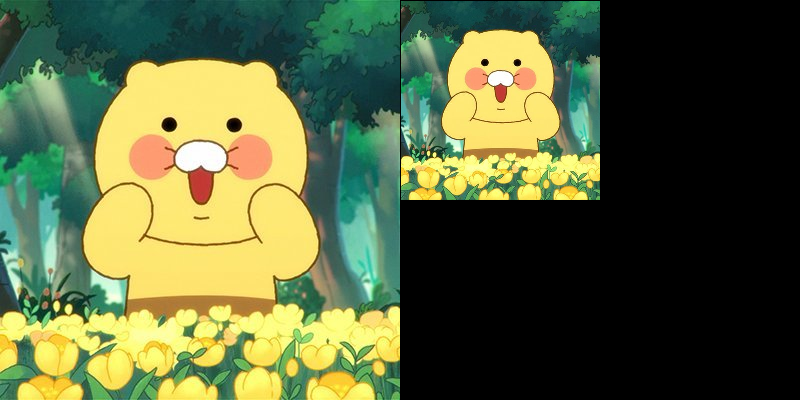

In [ ]:
height, width = image.shape[:2]
scale_factor = 0.5
scaling_matrix = np.array([[scale_factor,0,0],[0,scale_factor,0],[0,0,1]])
dst = np.zeros((height, width, image.shape[2]), dtype=np.uint8)
for y in range(height):
  for x in range(width):
    new_p = np.array([x,y,1])
    inv_scaling_matrix = np.linalg.inv(scaling_matrix)
    old_p = np.dot(inv_scaling_matrix, new_p)
    x_, y_ = old_p[:2]
    x_ = int(x_)
    y_ = int(y_)
    if x_>0 and x_<width and y_>0 and y_<height:
      dst.itemset((y,x,0), image.item(y_,x_,0))    # blue channel
      dst.itemset((y,x,1), image.item(y_,x_,1))    # green channel
      dst.itemset((y,x,2), image.item(y_,x_,2))    # red channel

result = cv2.hconcat([image,dst])
cv2_imshow(result)

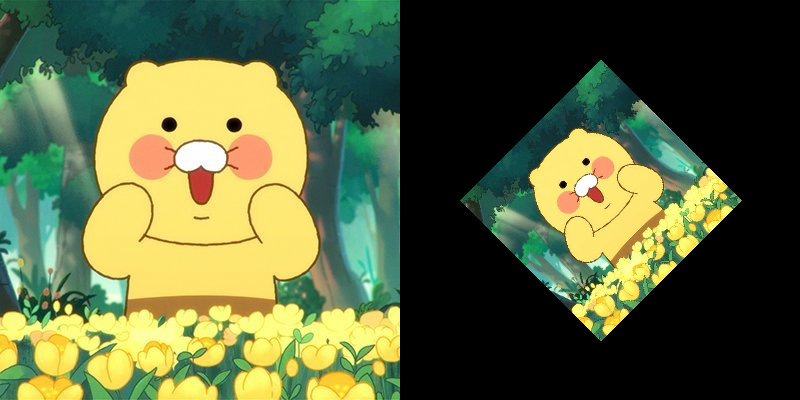

In [ ]:
translation_matrix = np.array([[1,0,width/4],[0,1,height/4],[0,0,1]])
angle = 45
radian = angle*np.pi/180
c = np.cos(radian)
s = np.sin(radian)
center_x = width/2
center_y = height/2
rotation_matrix = np.array([[c,s,(1-c)*center_x-s*center_y],[-s,c,s*center_x+(1-c)*center_y], [0,0,1]])

# 정해진 순서대로 변환 행렬을 곱하여 하나의 행렬을 생성
T = np.eye(3)
T = np.dot(scaling_matrix, T)
T = np.dot(translation_matrix, T)
T = np.dot(rotation_matrix, T)
dst = np.zeros((height, width, image.shape[2]), dtype=np.uint8)
for y in range(height):
  for x in range(width):
    new_p = np.array([x,y,1])
    inv_scaling_matrix = np.linalg.inv(T)
    old_p = np.dot(inv_scaling_matrix, new_p)
    x_, y_ = old_p[:2]
    x_ = int(x_)
    y_ = int(y_)
    if x_>0 and x_<width and y_>0 and y_<height:
      dst.itemset((y,x,0), image.item(y_,x_,0))    # blue channel
      dst.itemset((y,x,1), image.item(y_,x_,1))    # green channel
      dst.itemset((y,x,2), image.item(y_,x_,2))    # red channel

result = cv2.hconcat([image,dst])
cv2_imshow(result)

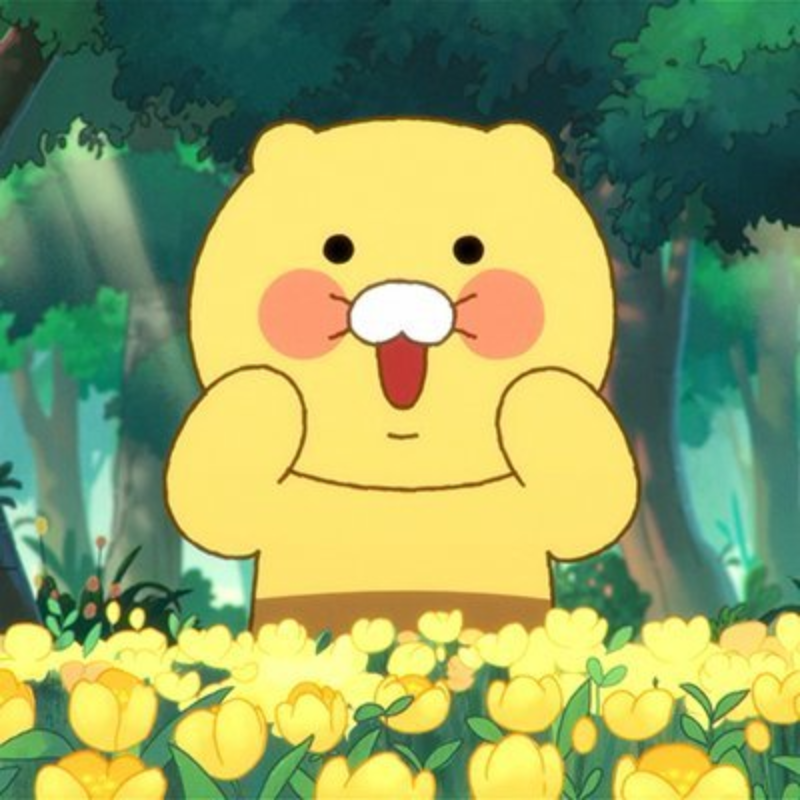

In [ ]:
dst = cv2.resize(image,(int(width*2), int(height*2)), interpolation=cv2.INTER_LINEAR)

cv2_imshow(dst)